In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in all the validation_results.log files from the different experiments
gqa = pd.read_csv('./GQA/validation_results.log')
mha = pd.read_csv('./MHA/validation_results.log')
mqa = pd.read_csv('./MQA/validation_results.log')

In [3]:
def ema_smooth(x, alpha=0.2):
    smoothed = []
    last = x[0]
    for v in x:
        last = alpha * v + (1 - alpha) * last
        smoothed.append(last)
    return smoothed

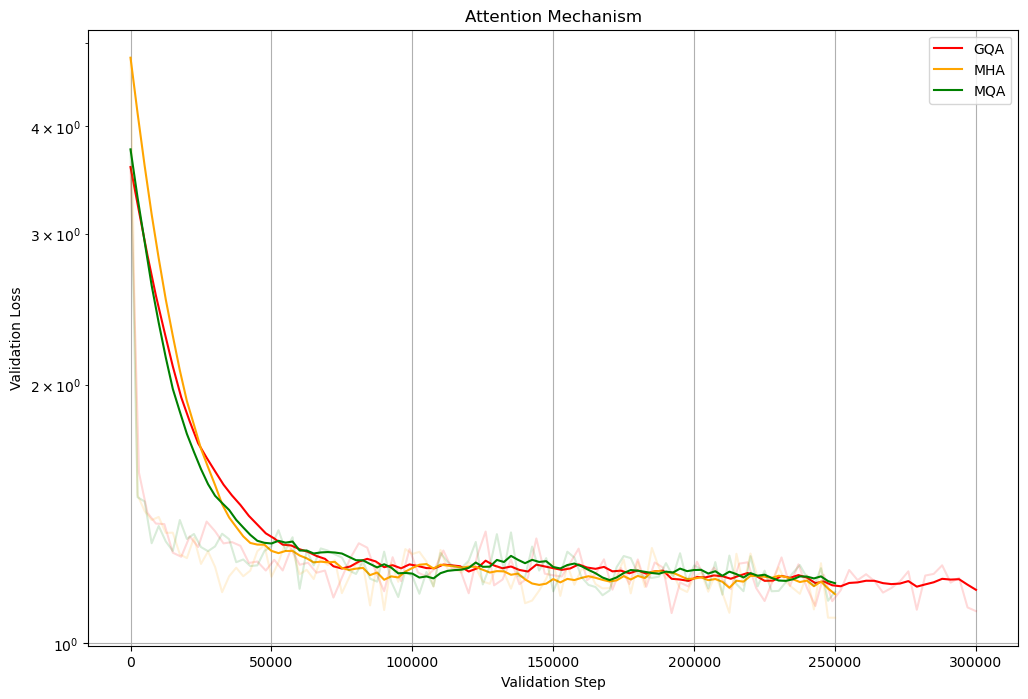

In [4]:
# Plotting all the validation loss curves for comparison
# Use vaLidation step as x-axis and validation loss as y-axis
plt.figure(figsize=(12, 8))

plt.plot(gqa['step'], gqa[' val_loss'], alpha=0.15, color='red')
plt.plot(gqa['step'], ema_smooth(gqa[' val_loss']), label='GQA', color='red')

plt.plot(mha['step'], mha[' val_loss'], alpha=0.15, color='orange')
plt.plot(mha['step'], ema_smooth(mha[' val_loss']), label='MHA', color='orange')

plt.plot(mqa['step'], mqa[' val_loss'], alpha=0.15, color='green')
plt.plot(mqa['step'], ema_smooth(mqa[' val_loss']), label='MQA', color='green')
plt.yscale('log')
plt.xlabel('Validation Step')
plt.ylabel('Validation Loss')
plt.title('Attention Mechanism')
plt.legend()
plt.grid()
plt.savefig('attention_mechanism.jpg')
plt.show()

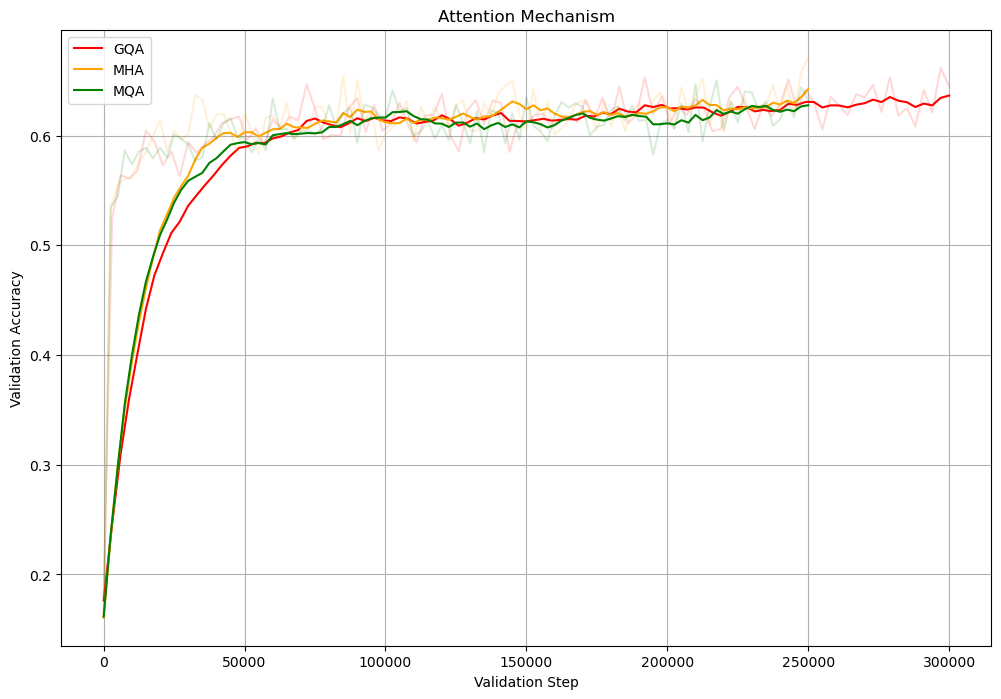

In [5]:
# Plotting all the validation accuracy curves for comparison
plt.figure(figsize=(12, 8))
plt.plot(gqa['step'], gqa[' val_acc'], alpha=0.15, color='red')
plt.plot(gqa['step'], ema_smooth(gqa[' val_acc']), label='GQA', color='red')

plt.plot(mha['step'], mha[' val_acc'], alpha=0.15, color='orange')
plt.plot(mha['step'], ema_smooth(mha[' val_acc']), label='MHA', color='orange')

plt.plot(mqa['step'], mqa[' val_acc'], alpha=0.15, color='green')
plt.plot(mqa['step'], ema_smooth(mqa[' val_acc']), label='MQA', color='green')

plt.xlabel('Validation Step')
plt.ylabel('Validation Accuracy')
plt.title('Attention Mechanism')
plt.legend()
plt.grid()
plt.show()

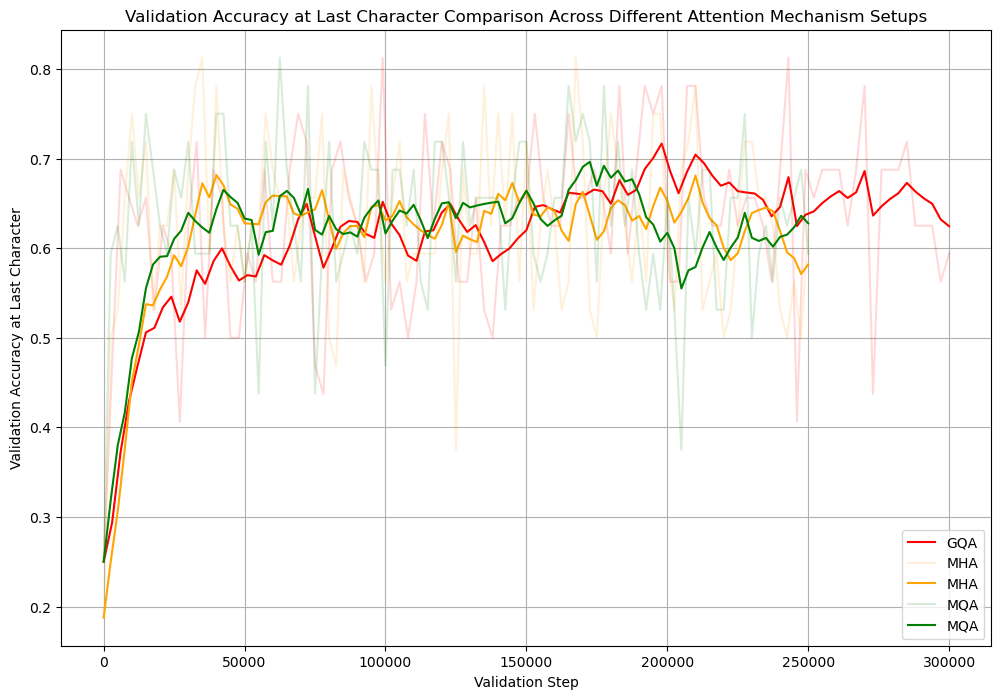

In [6]:
# Plotting all the validation accuracy at the last character curves for comparison
plt.figure(figsize=(12, 8))
plt.plot(gqa['step'], gqa[' last_char_val_acc'], alpha=0.15, color='red')
plt.plot(gqa['step'], ema_smooth(gqa[' last_char_val_acc']), label='GQA', color='red')

plt.plot(mha['step'], mha[' last_char_val_acc'], label='MHA', alpha=0.15, color='orange')
plt.plot(mha['step'], ema_smooth(mha[' last_char_val_acc']), label='MHA', color='orange')

plt.plot(mqa['step'], mqa[' last_char_val_acc'], label='MQA', alpha=0.15, color='green')
plt.plot(mqa['step'], ema_smooth(mqa[' last_char_val_acc']), label='MQA', color='green')

plt.xlabel('Validation Step')
plt.ylabel('Validation Accuracy at Last Character')
plt.title('Validation Accuracy at Last Character Comparison Across Different Attention Mechanism Setups')
plt.legend()
plt.grid()
plt.show()